/home/alonso/anaconda3/envs/eye_oct/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


31
5 ../dataset/Data_BL/IRD_RPE65_03_OS_20201019_04.vol
IRD_RPE65_03_OS_20201019_04
P012


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


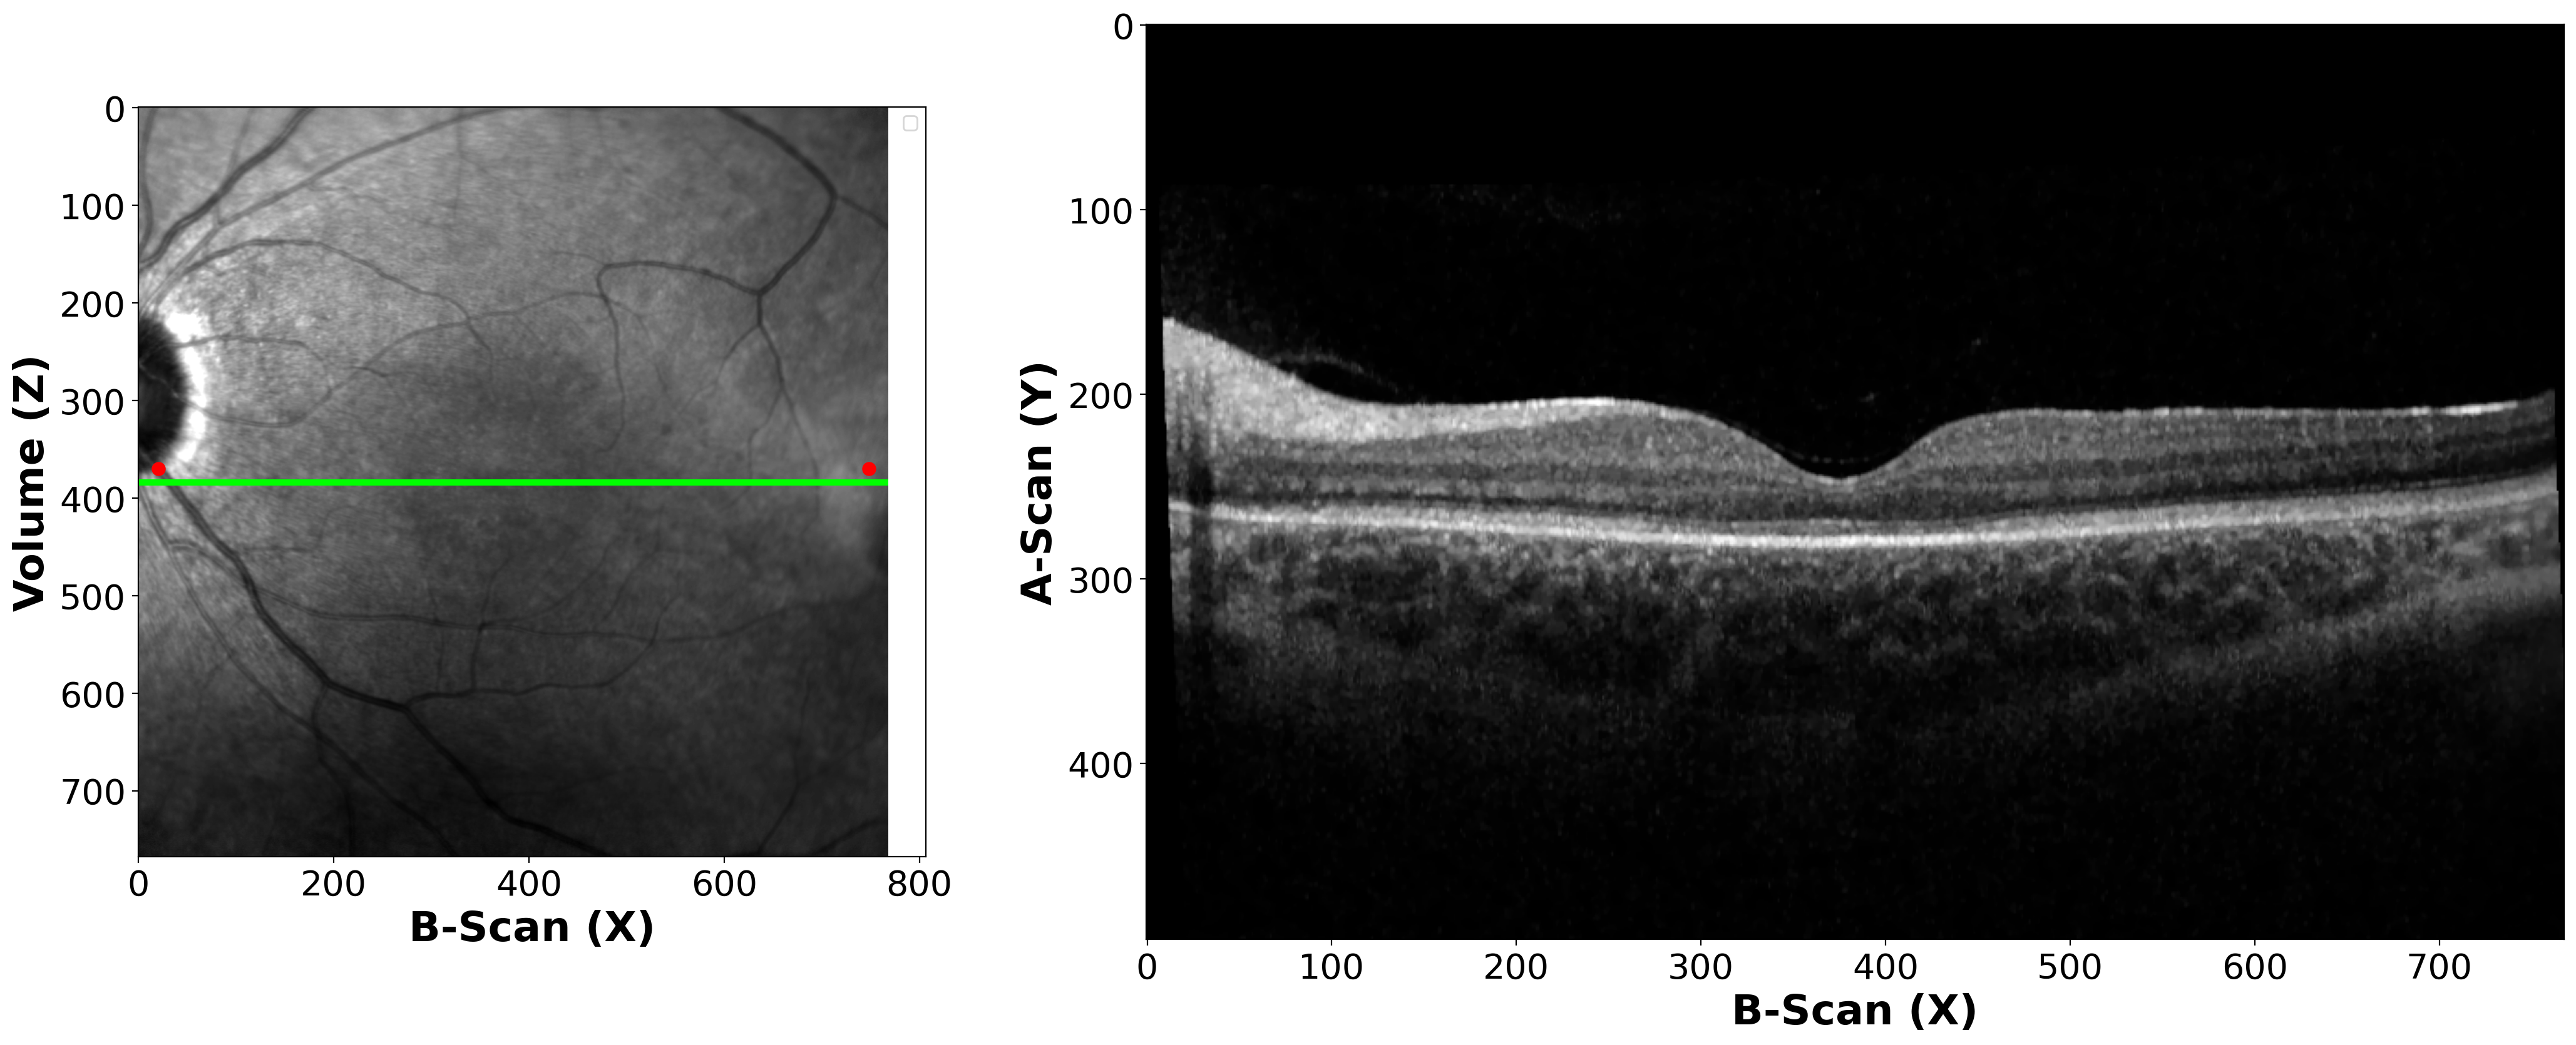

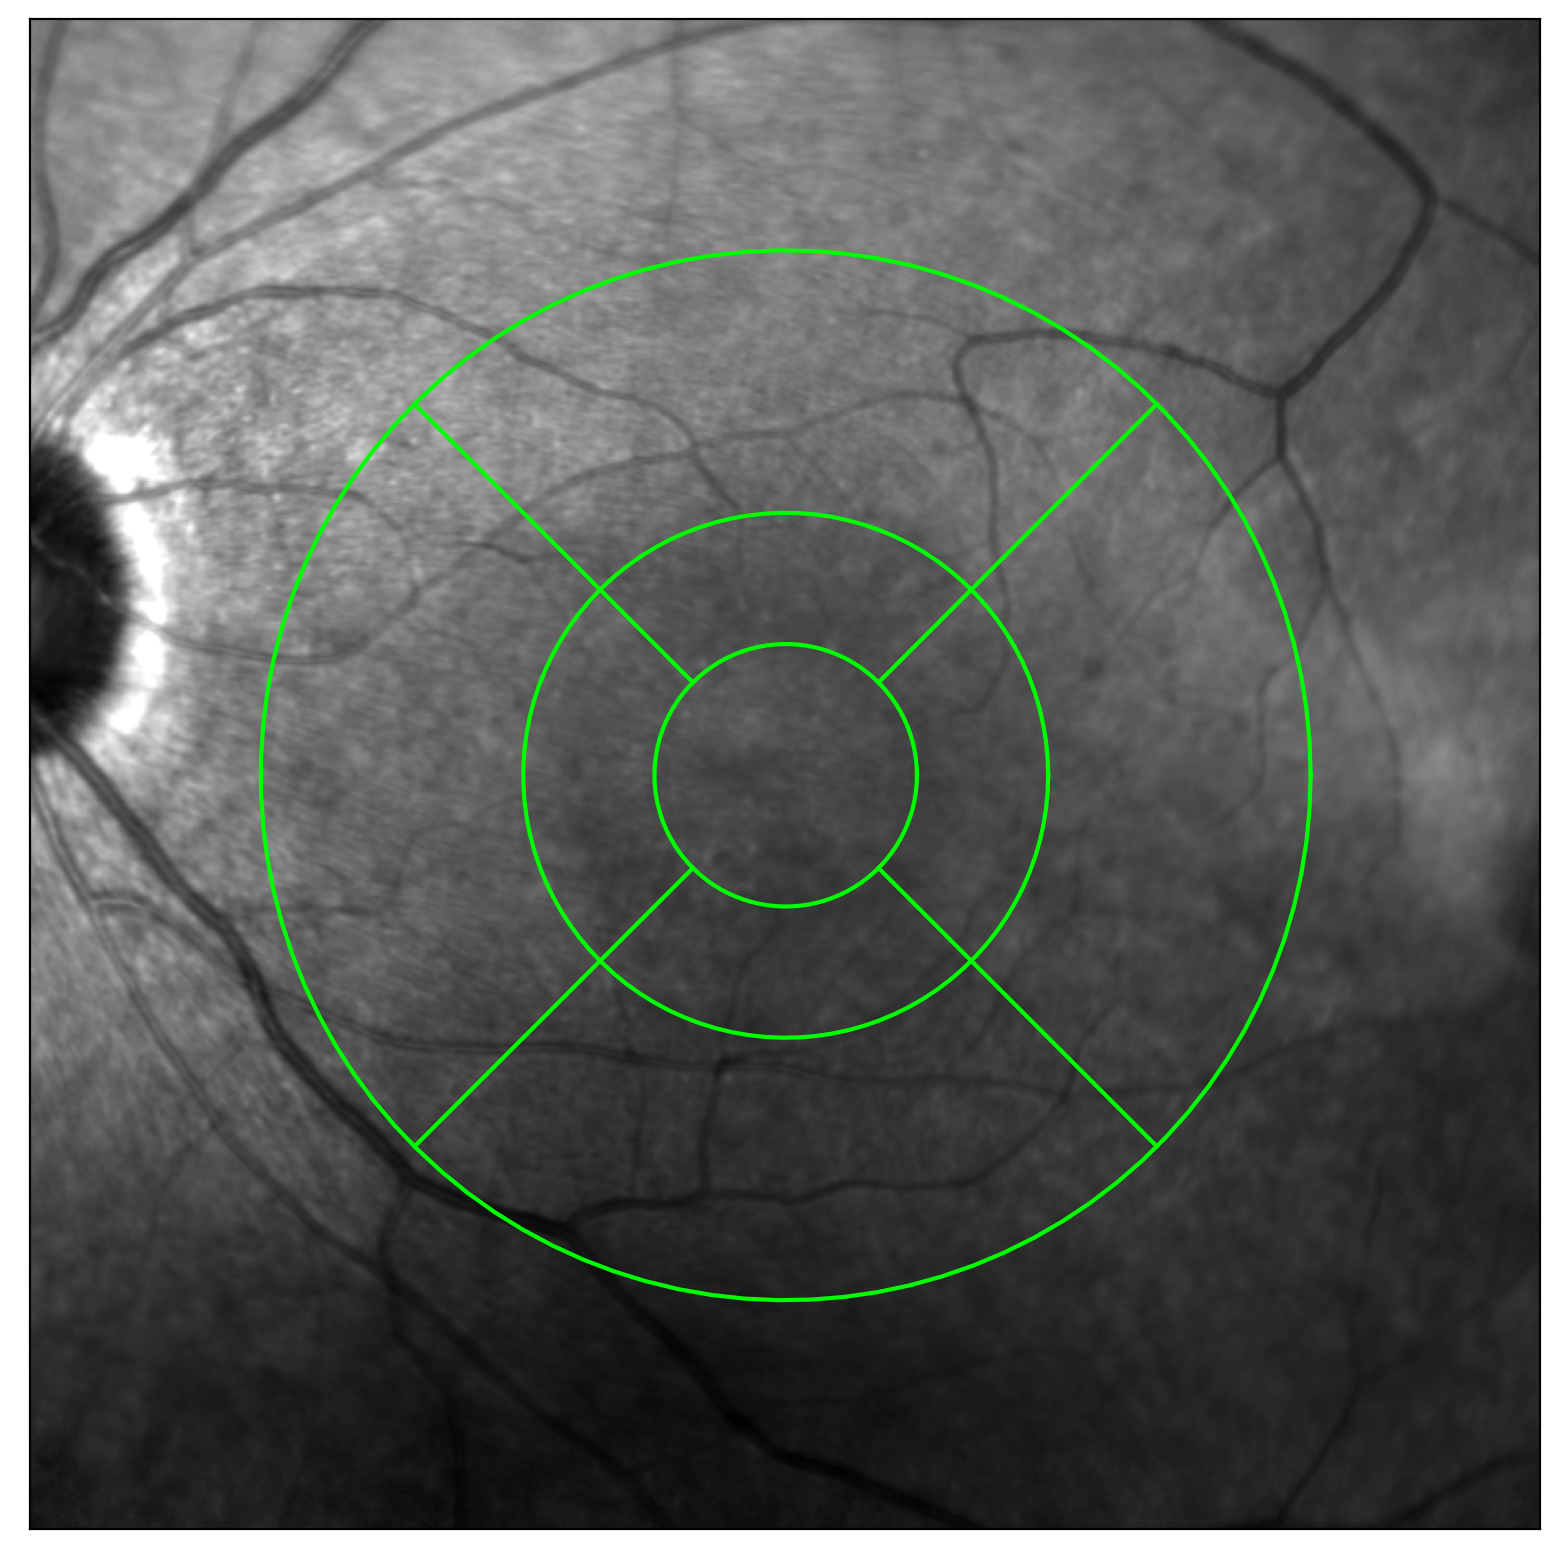

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from oct_library import OCTProcessing
from utils.utils import get_filenames

base_path = '../logs/unet_08_23_00_58_32_merged/'
model_path = os.path.join(base_path, 'checkpoints/model.pth')
config_path = os.path.join(base_path, 'experiment_cfg.yaml')

oct_path = '../dataset/Analysis_dataset'
# oct_path = '../dataset/2_OCTAnnotated'
oct_path = '../dataset/OCT_EZ/F_OCT'
oct_path = '../dataset/Data_BL/'
oct_files = get_filenames(oct_path, 'vol')
print(len(oct_files))

pick = np.random.randint(0,len(oct_files))
print(pick, oct_files[pick])

oct_process = OCTProcessing(oct_file=oct_files[pick], config_path=config_path, model_path=model_path) # 125, 36, 10, 68, 15, -2, -8, 21
oct_process.plot_slo_fovea()
oct_process.plot_slo_etdrs()
# plt.savefig('slo_etdrs.svg')
# plt.figure(figsize=(25,10))

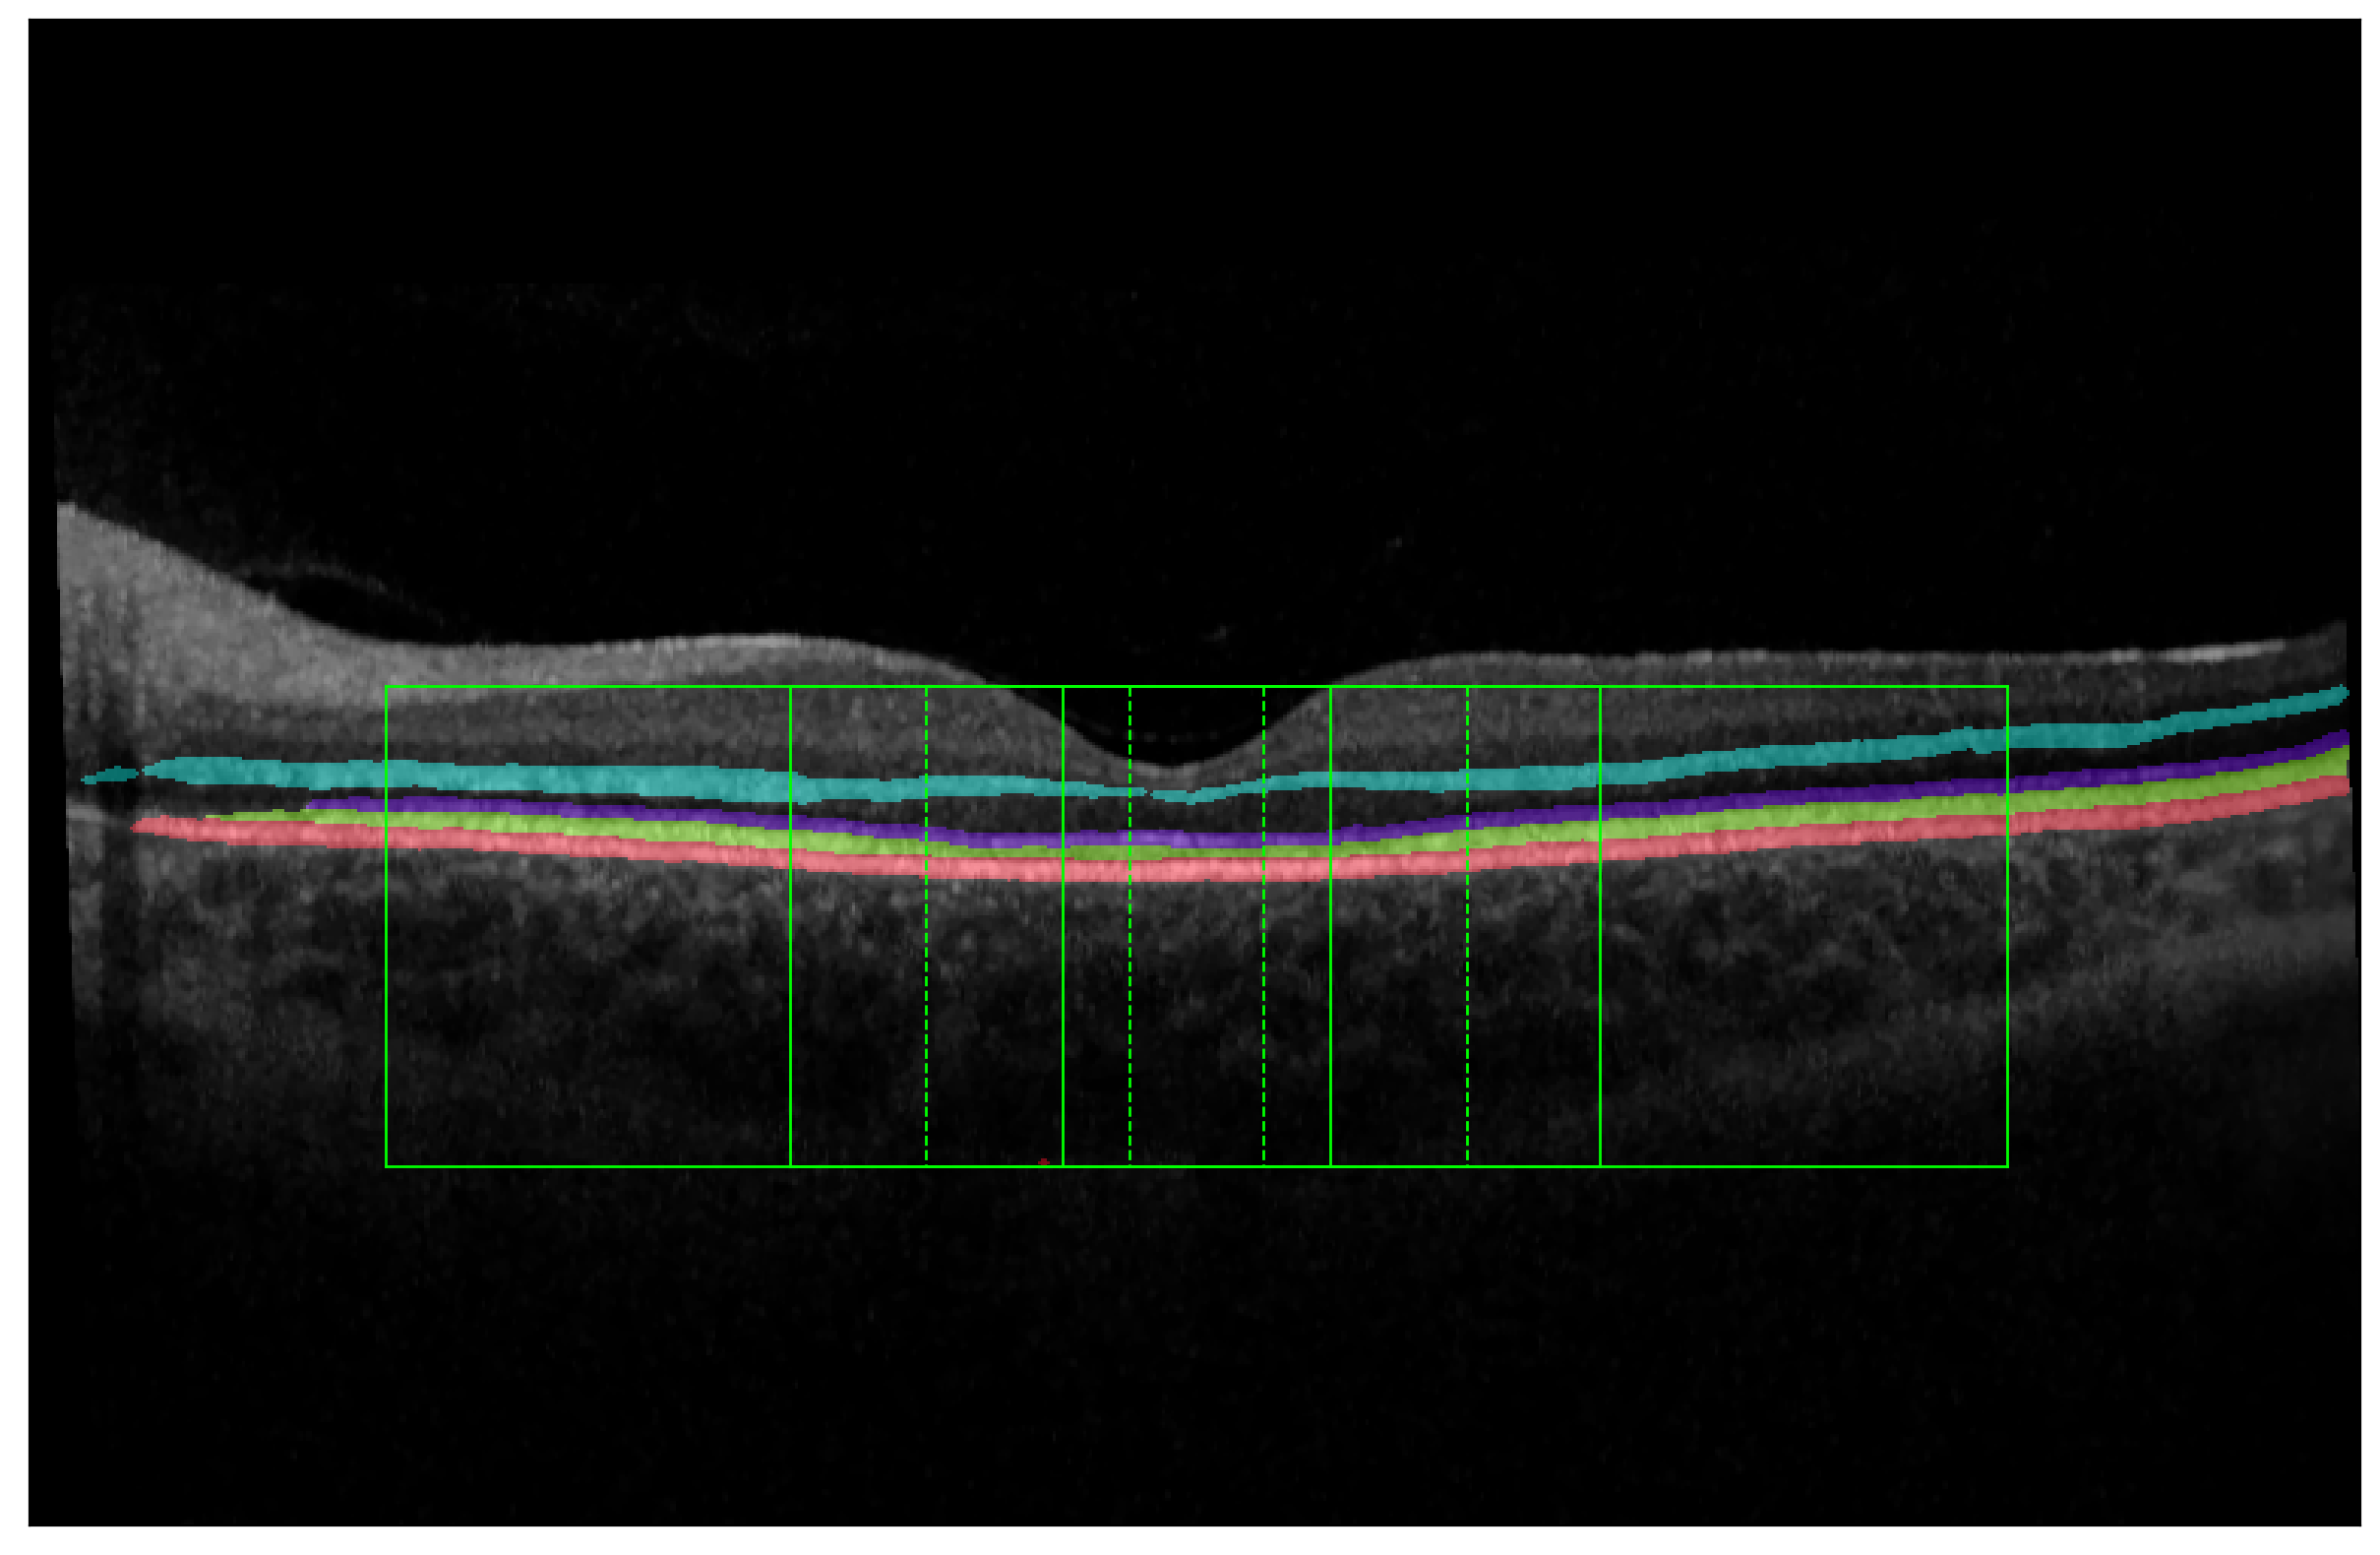

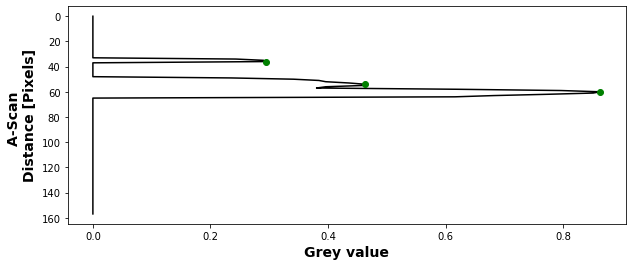

PID : P012_OS_20201019_04
Patient : RPE65
Laterality : OS
DOB : 2012-01-26
Age : pediatric
visit_date : 2020-10-19
DOS : 2021-02-10
MPT : -3
N_Bscans : 1
Fovea_BScan : 0
scale_y : 0.0038716697599738836
scale_x : 0.011182204820215702
Y_Fovea : 370.0
Fovea_xstart : 0.0
Fovea_xstop : 741.0
Volume_area : nan
ETDRS_loc : 1mm
rEZI_mean : 38.61688873749337
EZ_th_mean : 7.565331714891497
EZ_OPL_mean : 80.19251617784987
EZ_ELM_mean : 15.17870530898852
EZ_BM_mean : 36.208911505210295
ELM_BM_mean : 51.38761681419882
EZ_TV_mean : 0.5331347728965004
rEZI_std : 8.058512264657427
EZ_th_std : 3.263543852533964
EZ_OPL_std : 10.350698503000107
EZ_ELM_std : 3.155178227608445
EZ_BM_std : 3.199044559776959
ELM_BM_std : 2.082282472165421
EZ_TV_std : 0.07299628272882322
rEZI_mean_nasal : 36.78708643652897
EZ_th_mean_nasal : 9.45407732086646
EZ_OPL_mean_nasal : 74.37207492414949
EZ_ELM_mean_nasal : 15.398686545350673
EZ_BM_mean_nasal : 37.39681018156592
ELM_BM_mean_nasal : 52.795496726916596
EZ_TV_mean_nasal 

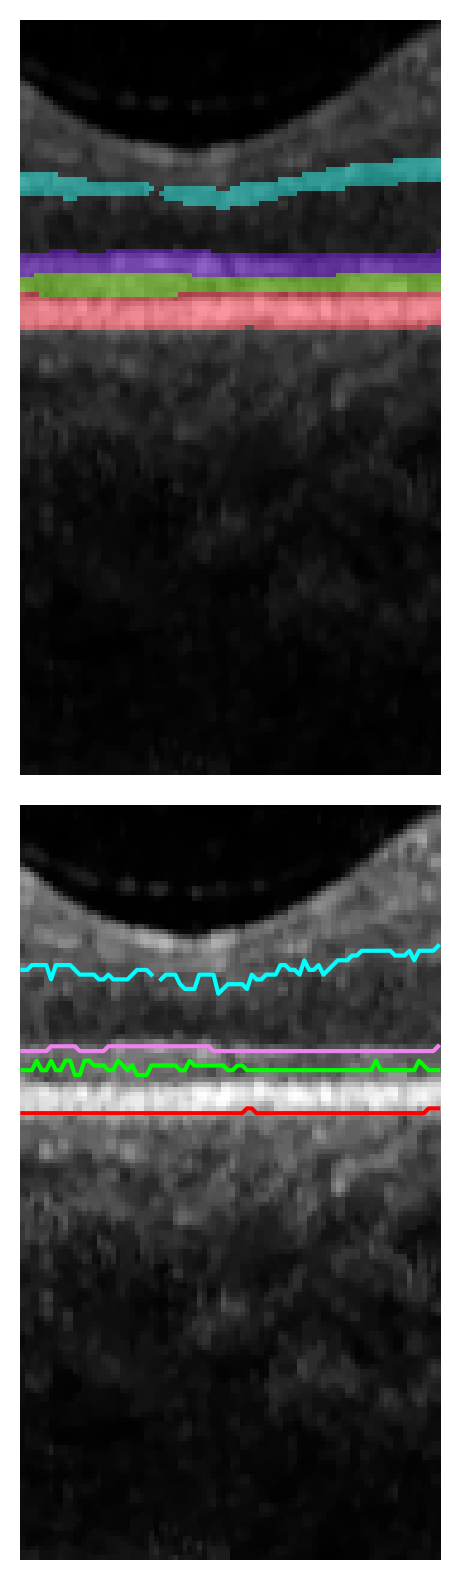

In [2]:
oct_process.fovea_forward(ETDRS_loc='1mm')
oct_process.plot_segmentation_localization(etdrs=True)
oct_process.plot_intensity_profiles()
# oct_process.plot_total_variation_alphas(beta=3, xlabel=True)
# plt.savefig('control_beta3.svg')
# oct_process.plot_total_variation_alphas(beta=5, xlabel=True)
# plt.savefig('control_beta5.svg')
# oct_process.plot_total_variation_alphas(beta=7, xlabel=True)
# plt.savefig('control_beta7.svg')
# plt.show()
for key, value in oct_process.results.items():
    print(key, ':', value)
oct_process.plot_results_roi()

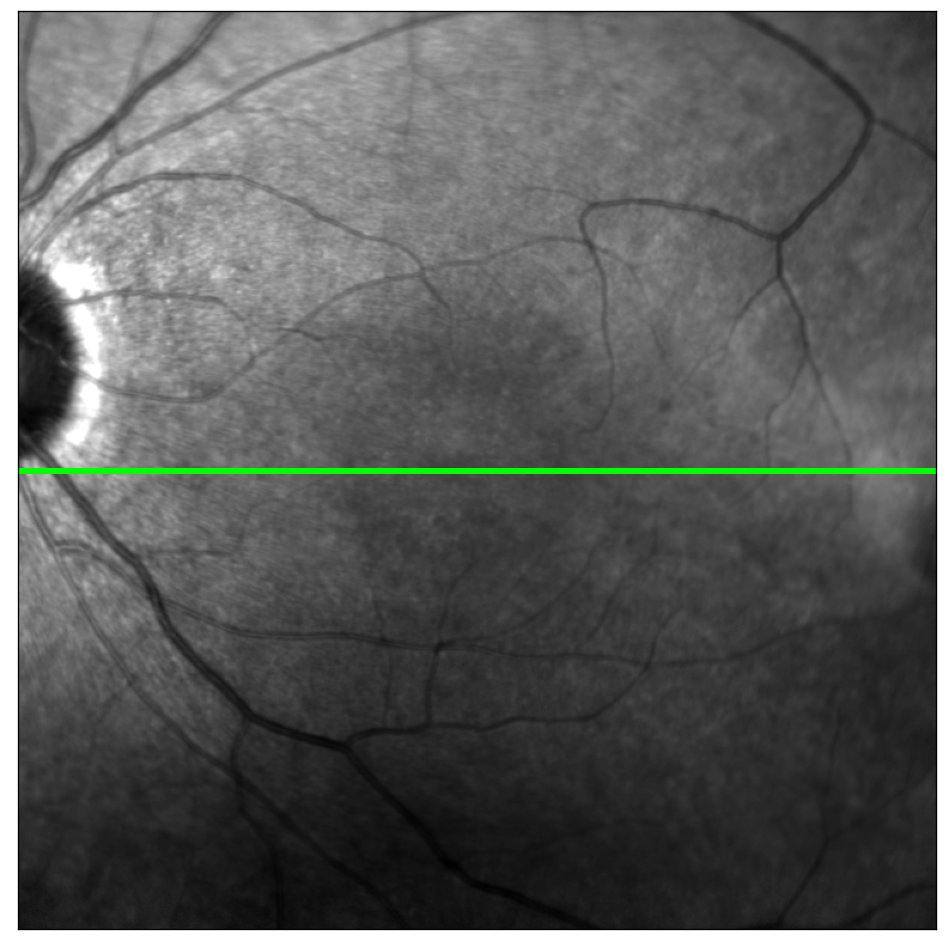

In [3]:
# base_path = '../logs/unet_07_13_07_02_11/' #logs/BEST_0.94, logs/2023-01-22_02_39_26
# model_path = os.path.join(base_path, 'checkpoints/model.pth')
oct_process.volume_forward(big_model_path=None, interpolated=True, tv_smooth=True, plot=True, bscan_positions=False)
# plt.savefig('EZ_volume_limits_RPE65.svg')